In [1]:
# General Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import re
from datetime import datetime
from IPython.display import HTML

plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
df=pd.read_csv('/kaggle/input/google-playstore-apps/Google-Playstore.csv')

In [3]:
df.shape

(2312944, 24)

In [4]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [6]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


# DATA TRANSFORMATION 



Changing Size Dtype in float64 here 

In [7]:
temp_size=[]
for x in df.Size:
    if  pd.isna(x):
        temp_size.append(np.nan)
    elif 'G' in x:
        temp_size.append(float(re.sub('G','',x))*1000)
    elif  'M' in x:
        temp_size.append(float(re.sub('M|,','',x)))
    elif 'K' in x or 'k' in x:
        temp_size.append(float(re.sub('K|k|,','',x))/1000.0)
    else:
        temp_size.append(0)
    
df.Size = temp_size

changing Released Dtype in datetime64[ns] here

In [8]:
Released = []
for x in df.Released:
    if  pd.isna(x):
        Released.append(np.nan)
    else:
        Released.append(datetime.strptime(x, '%b %d, %Y'))
    
df.Released = Released

changing Last Updated Dtype in datetime64[ns] here

In [9]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   App Name           object        
 1   App Id             object        
 2   Category           object        
 3   Rating             float64       
 4   Rating Count       float64       
 5   Installs           object        
 6   Minimum Installs   float64       
 7   Maximum Installs   int64         
 8   Free               bool          
 9   Price              float64       
 10  Currency           object        
 11  Size               float64       
 12  Minimum Android    object        
 13  Developer Id       object        
 14  Developer Website  object        
 15  Developer Email    object        
 16  Released           datetime64[ns]
 17  Last Updated       datetime64[ns]
 18  Content Rating     object        
 19  Privacy Policy     object        
 20  Ad Supported       bool 

# EDA


### Rating with Boxplot Graph 


Number of apps that is not rated: 45.82%



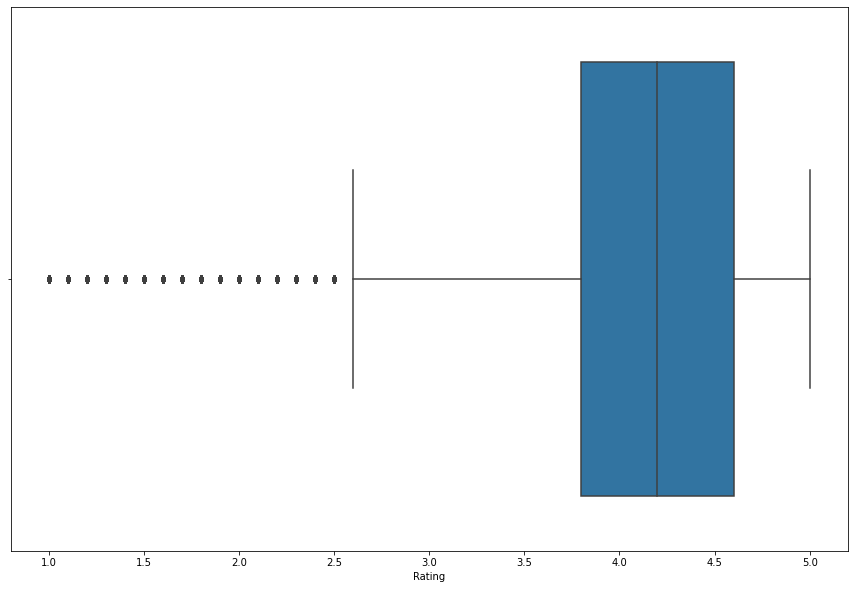

In [11]:
print(f"Number of apps that is not rated: {(df[df.Rating==0].shape[0]/df.shape[0])*100:.2f}%\n")
_ = sns.boxplot(data=df[df.Rating>0], x="Rating")

### Rating with Histogram Graph

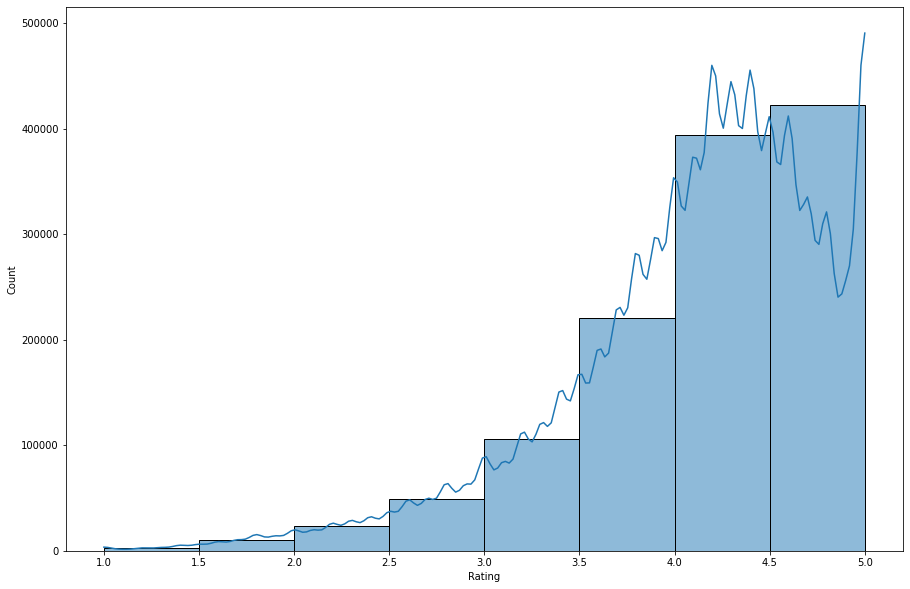

In [12]:
_=sns.histplot(data=df[df.Rating > 0], x = "Rating",kde=True,binwidth=0.5)

### The first 20 Category App

In [13]:
pie_data = df.Category.value_counts()


In [14]:

graph_data = pie_data[:19]
graph_data["Others"] = pie_data[20:].sum()

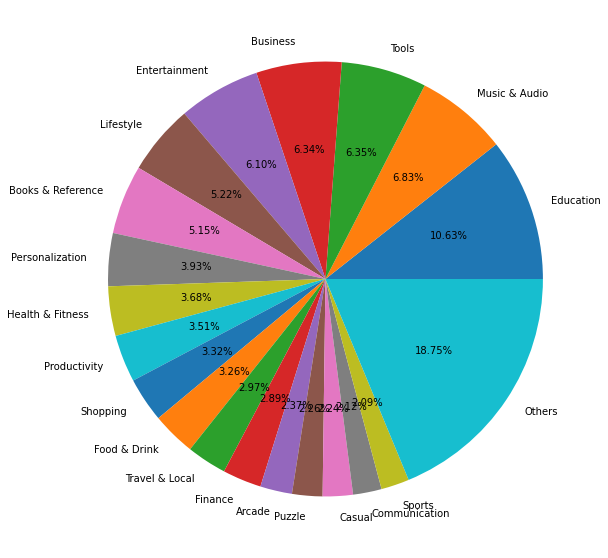

In [15]:
_ = plt.pie(graph_data.values, labels=graph_data.keys(), autopct='%1.2f%%')

### Free & Paid App

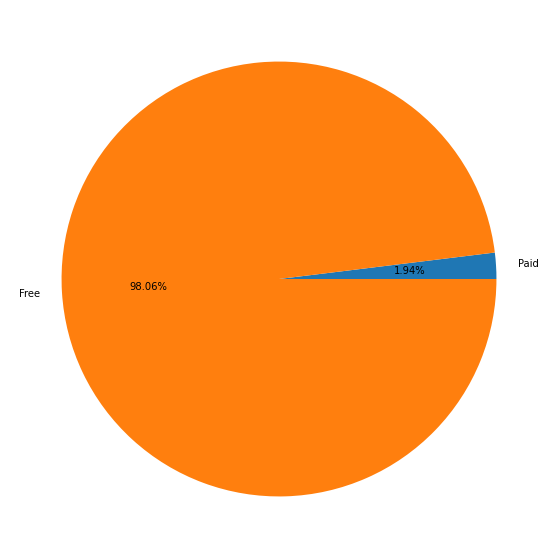

In [16]:
paid_free_data = {
    "Paid": df.Price[df.Price > 0].count(),
    "Free": df.Price[df.Price == 0].count()
}

_ = plt.pie(paid_free_data.values(), labels=paid_free_data.keys(), autopct='%1.2f%%')

### Prices of Paid App

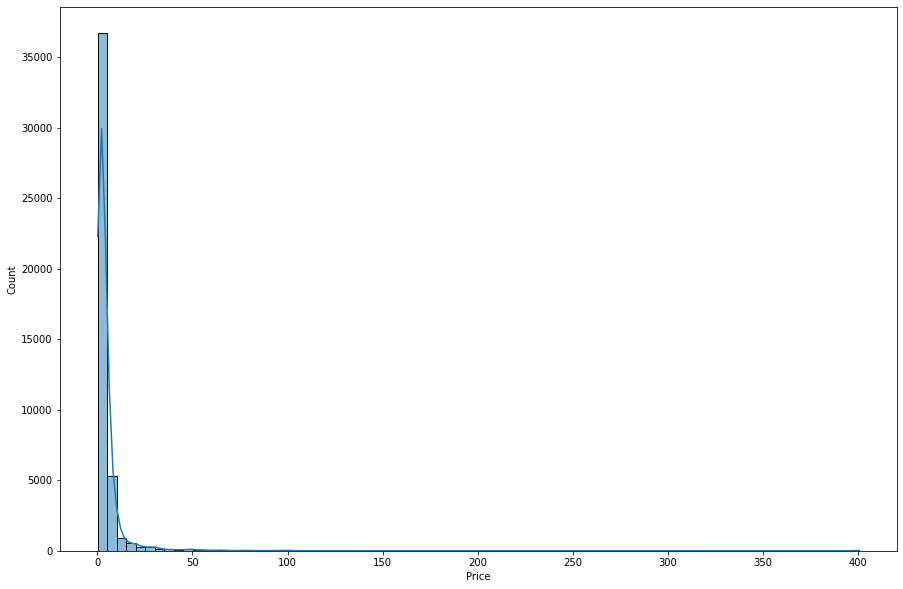

In [17]:
_ = sns.histplot(data=df[df.Price > 0], x = "Price",kde=True,binwidth=5)

### Size of App

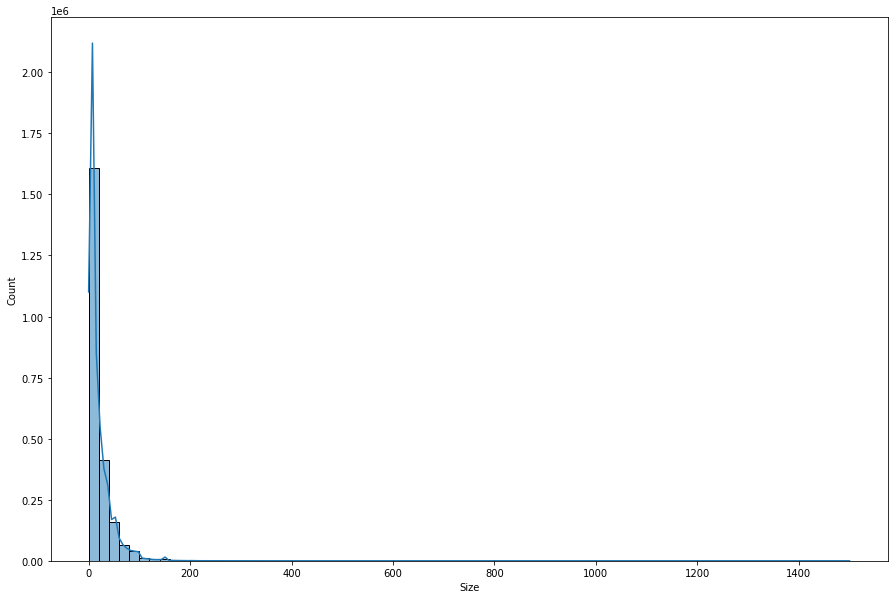

In [18]:
_ = sns.histplot(data=df,x="Size",kde=True,binwidth=20)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   App Name           object        
 1   App Id             object        
 2   Category           object        
 3   Rating             float64       
 4   Rating Count       float64       
 5   Installs           object        
 6   Minimum Installs   float64       
 7   Maximum Installs   int64         
 8   Free               bool          
 9   Price              float64       
 10  Currency           object        
 11  Size               float64       
 12  Minimum Android    object        
 13  Developer Id       object        
 14  Developer Website  object        
 15  Developer Email    object        
 16  Released           datetime64[ns]
 17  Last Updated       datetime64[ns]
 18  Content Rating     object        
 19  Privacy Policy     object        
 20  Ad Supported       bool 

### AD Supported App

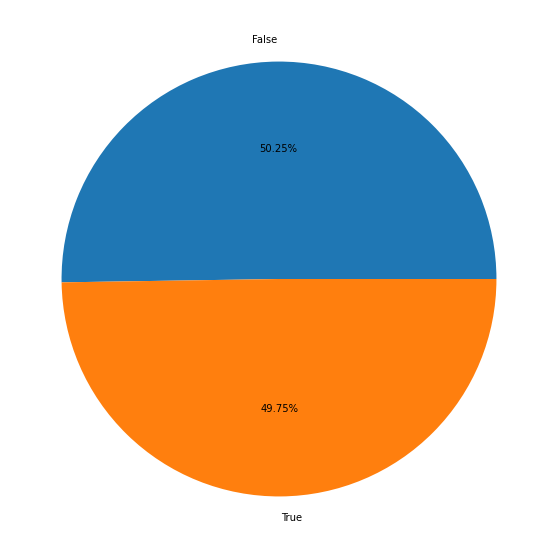

In [20]:
ad_supported=df["Ad Supported"].value_counts()
_ = plt.pie(ad_supported.values, labels=ad_supported.keys(), autopct='%1.2f%%')

### Purchase Option in App

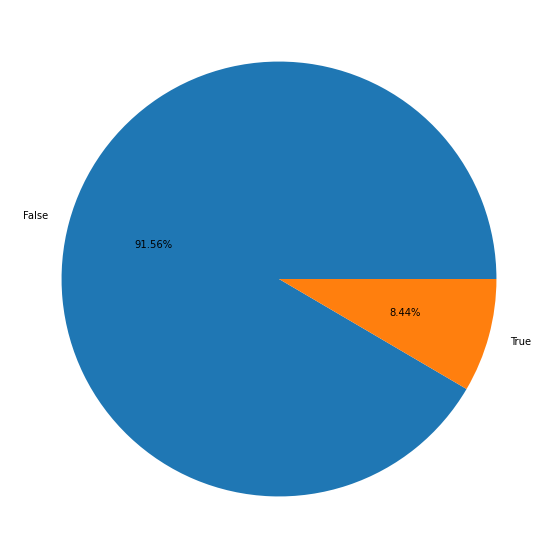

In [21]:
app_purchase = df["In App Purchases"].value_counts()
_ = plt.pie(app_purchase.values, labels=app_purchase.keys(), autopct='%1.2f%%')

### Top 10 Minimum Android version

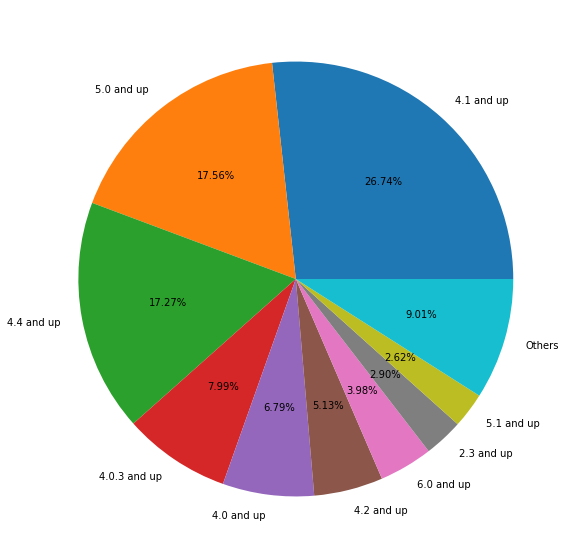

In [22]:
android_version = df["Minimum Android"].value_counts()

graph_data = android_version[:9]
graph_data["Others"] = android_version[10:].sum()

_ = plt.pie(graph_data.values, labels=graph_data.keys(), autopct='%1.2f%%')

### Top 10 most expensive App 

In [23]:
sorted_df = df.sort_values(by=['Price'], ascending=False)
HTML(sorted_df[["App Name","Category","Rating","Maximum Installs","Price"]][0:10].to_html(index=False))

App Name,Category,Rating,Maximum Installs,Price
MESH Connect,Productivity,0.0,25,400.00
Why Not,Lifestyle,0.0,0,399.99
Acid Reflux Treatment,Health & Fitness,0.0,1,399.99
Most expensive word game,Board,3.4,5523,399.99
Taxes,Business,0.0,0,399.99
RichWall,Social,0.0,0,399.99
Точки интереса,Maps & Navigation,4.1,1000,399.99
Baby Nightmares,Arcade,0.0,5,399.99
TEST EGY,Tools,0.0,0,399.99
Luxsure,Entertainment,0.0,1,399.99


### Top 10 Maximum Installs App Table

In [24]:
sorted_Install= df.sort_values(by=['Maximum Installs'], ascending=False)
HTML(sorted_Install[["App Name","Category","Rating","Price","Maximum Installs"]][0:10].to_html(index=False))

App Name,Category,Rating,Price,Maximum Installs
Google Play services,Tools,4.2,0.0,12057627016
YouTube,Video Players & Editors,4.4,0.0,9766230924
Google,Tools,4.2,0.0,9154248491
Google Maps - Navigate & Explore,Travel & Local,3.8,0.0,9141671889
Google Text-to-Speech,Tools,4.1,0.0,9034404884
Google Chrome: Fast & Secure,Communication,4.1,0.0,8925640788
Gmail,Communication,4.2,0.0,8756574289
Android Accessibility Suite,Tools,4.2,0.0,7408134567
Google Drive,Productivity,4.3,0.0,7028265259
Facebook,Social,2.3,0.0,6782619635


##### Facebook's rating on Google Play Store dropped from 4.0 to 2.6 as a result of a boycott of the social media platform, which was sparked by Facebook's removal of posts that protested against Israeli military action against Palestinians.

### The most Rated top 10 Category

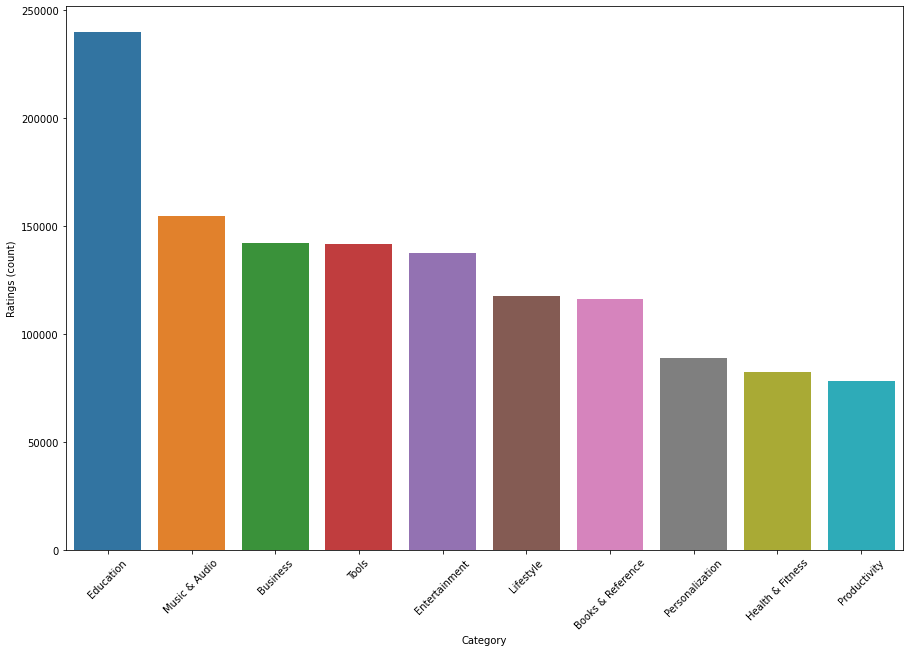

In [25]:
a = df.groupby(["Category"])["Rating"].count().sort_values(ascending=False)[:10]
ax = sns.barplot(x=a.keys(), y=a.values)
ax.tick_params(axis='x', labelrotation = 45)
ax = plt.ylabel('Ratings (count)')

### Top 10 category with price

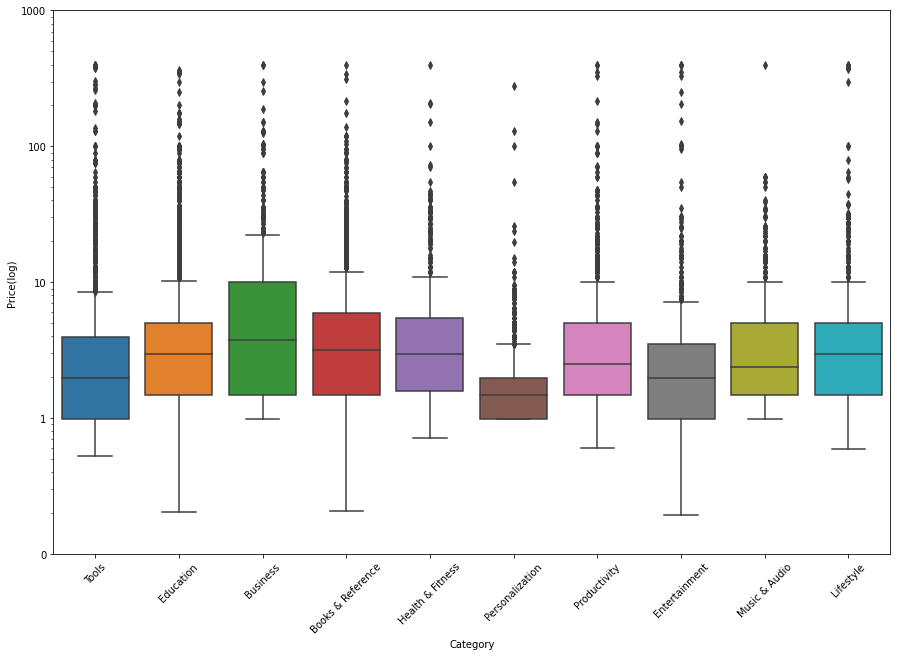

In [26]:
topTenCategoriesNames=df["Category"].value_counts()[0:10].keys()
a = df[df.Category.isin(topTenCategoriesNames)]
a = a[a.Price>0]
ax = sns.boxplot(data=a, x="Category", y="Price")
ax.set_yscale('log',base=10)
ax.set_ylim(0.1,1000)
ax.set_ylabel('Price(log)')
ax.tick_params(axis='x', labelrotation = 45)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

### Top 10 category with Rating

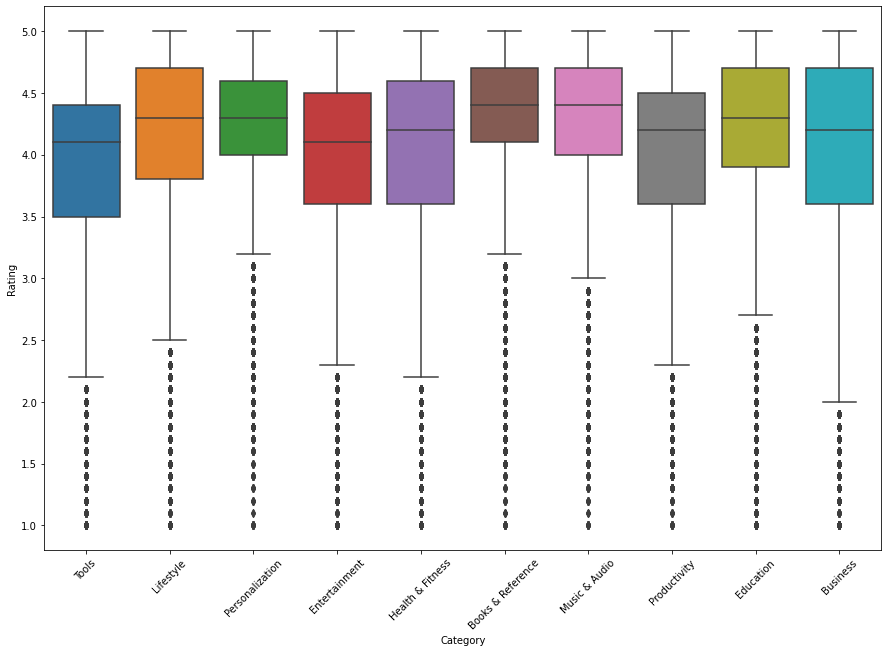

In [27]:
a = df[df.Category.isin(topTenCategoriesNames)]
a = a[a.Rating>0]
ax = sns.boxplot(data=a, x="Category", y="Rating")
ax.tick_params(axis='x', labelrotation = 45)


### Top 10 category with Size

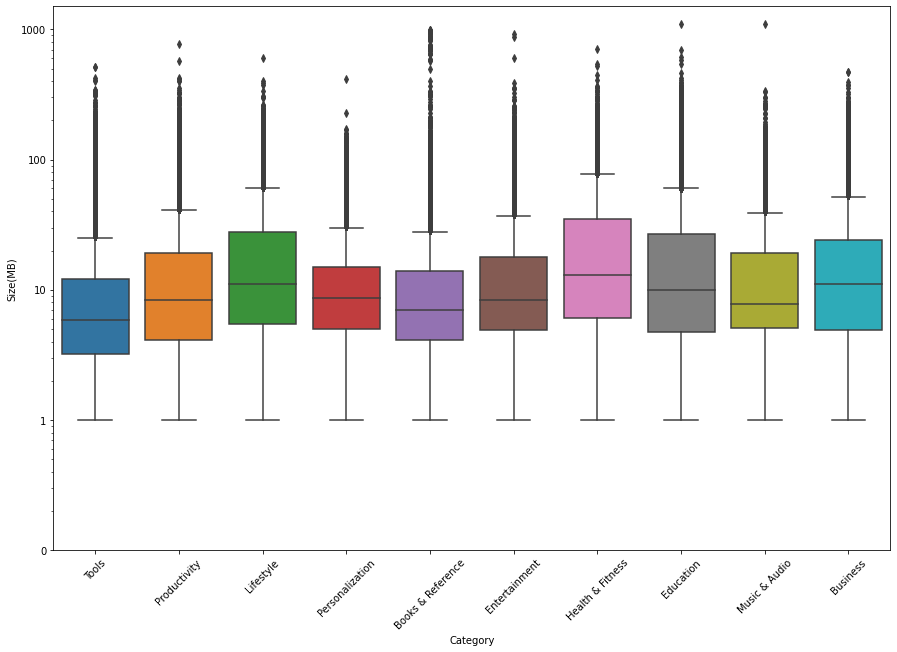

In [28]:
a = df[df.Category.isin(topTenCategoriesNames)]
a = a[a.Size>=1]
ax = sns.boxplot(data=a, x="Category", y="Size")
ax.set_yscale('log',base=10)
ax.set_ylabel('Size(MB)')
ax.set_ylim(0.1,1500.0)
ax.tick_params(axis='x', labelrotation = 45)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

### Top 10 category with Ad Supported 

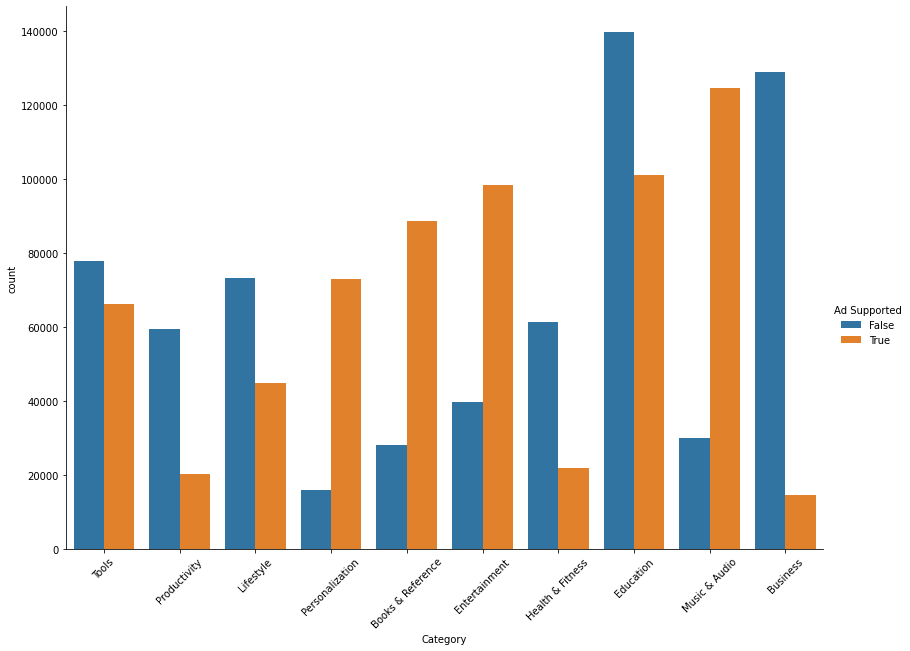

In [29]:
a = df[df.Category.isin(topTenCategoriesNames)]
ax = sns.catplot(data=a,kind="count", x="Category", hue="Ad Supported",height=8.27, aspect=11.7/8.27)
ax.set_xticklabels(rotation= 45)

### Top 10 Developer

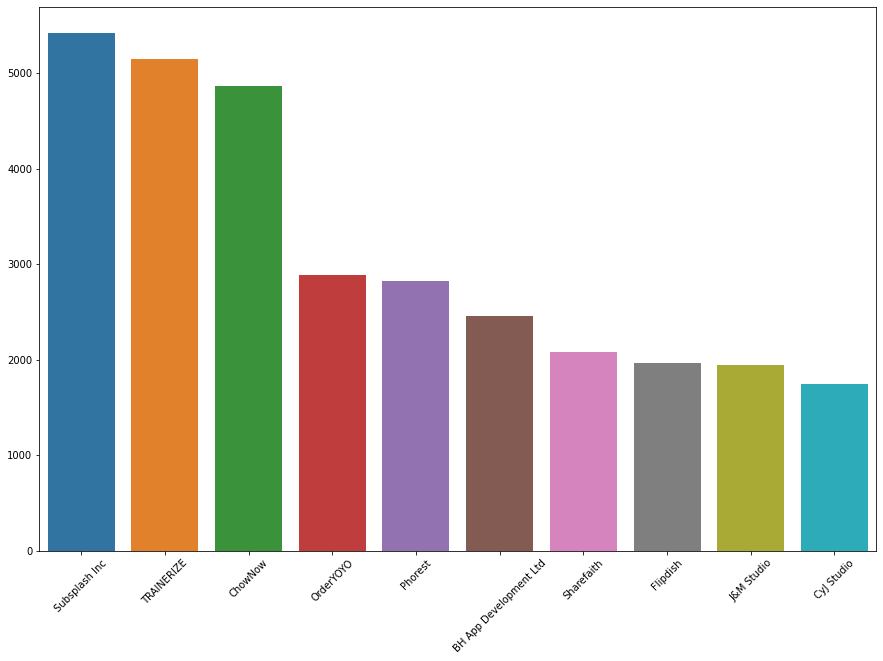

In [30]:
topTenDeveloperID= df["Developer Id"].value_counts()[0:10]
ax = sns.barplot(x=topTenDeveloperID.keys() , y=topTenDeveloperID.values)
ax.tick_params(axis='x', labelrotation = 45)



### Price, Rating with Size

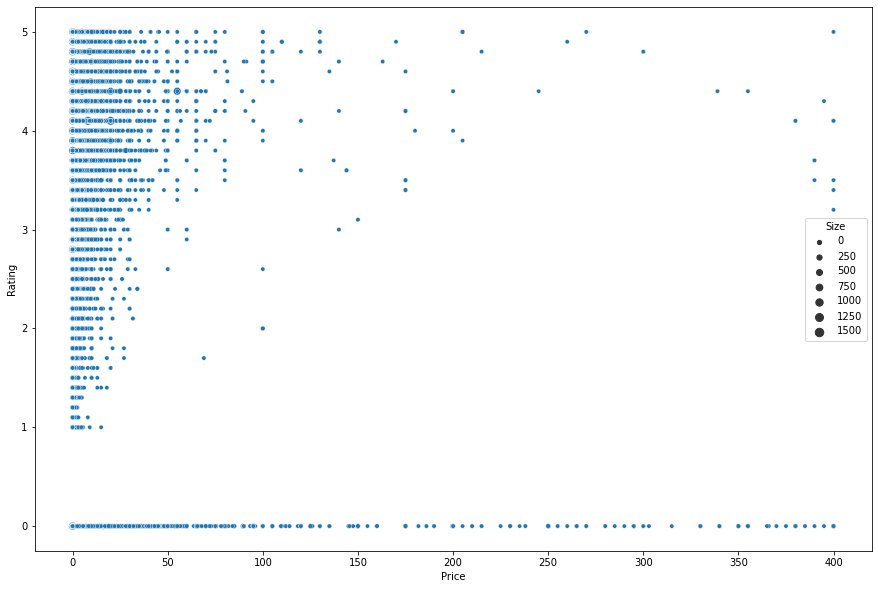

In [31]:
ax = sns.scatterplot( data=df, x="Price", y="Rating", size=df["Size"],)

### Price, Rating with Max-Installs

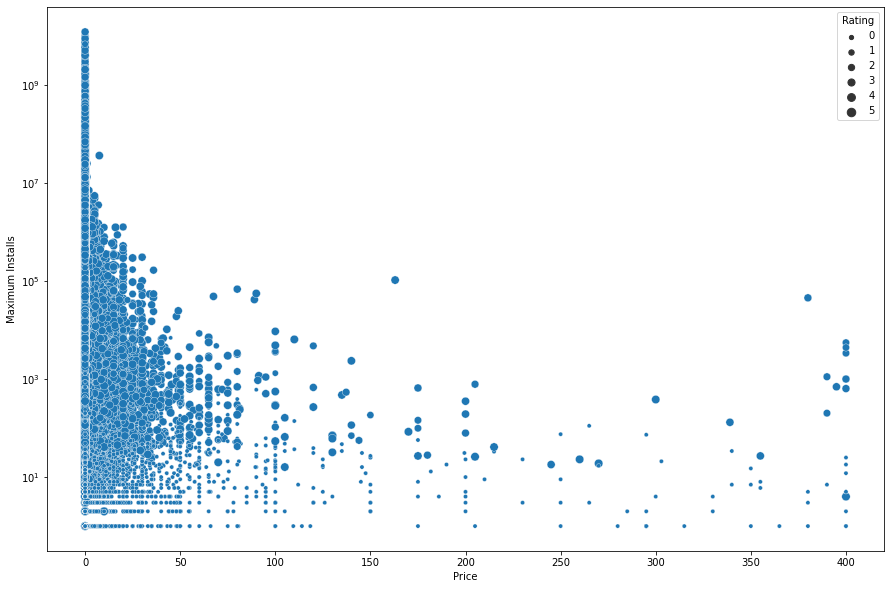

In [32]:
ax = sns.scatterplot( data=df, x="Price", y="Maximum Installs", size=df["Rating"],) 
ax.set_yscale('log',base=10)
# ax.set_ylim(0.1,1000)

### Abondened & Non-Abondened App before 2019

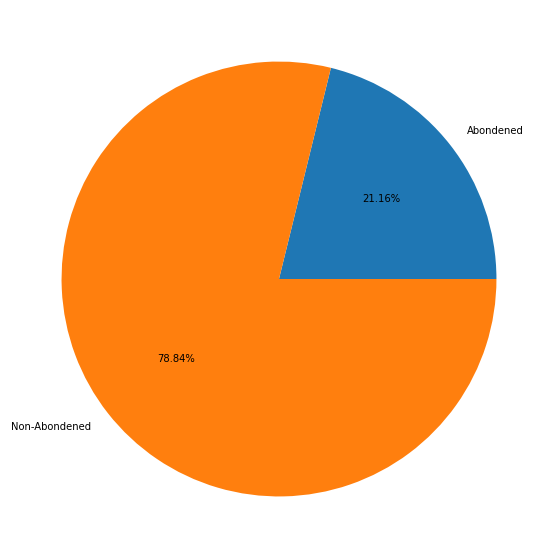

In [33]:
app = {
    "Abondened":(df[df["Last Updated"]<"2019"]).shape[0] ,
    "Non-Abondened":(df[df["Last Updated"]>="2019"]).shape[0] 
}

ax = plt.pie(app.values(), labels=app.keys(), autopct='%1.2f%%')

### Rating of Abondened & Non-Abondoned App

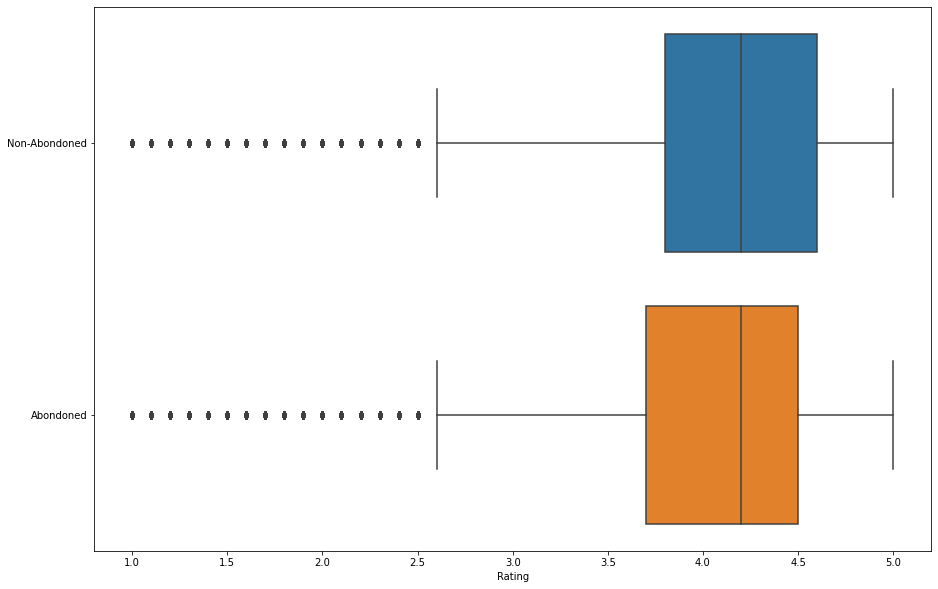

In [34]:
ratingFilteredDf = df[df.Rating > 0]
app_Rating = {
    "Abondened":["Abondoned" if x else "Non-Abondoned" for x  in ratingFilteredDf["Last Updated"]<="2019"],
    "Abondened_Rating":ratingFilteredDf["Rating"]

}




ax = sns.boxplot(data=app_Rating, x="Abondened_Rating",  y="Abondened" )

### Price of Abondened & Non-Abondoned App

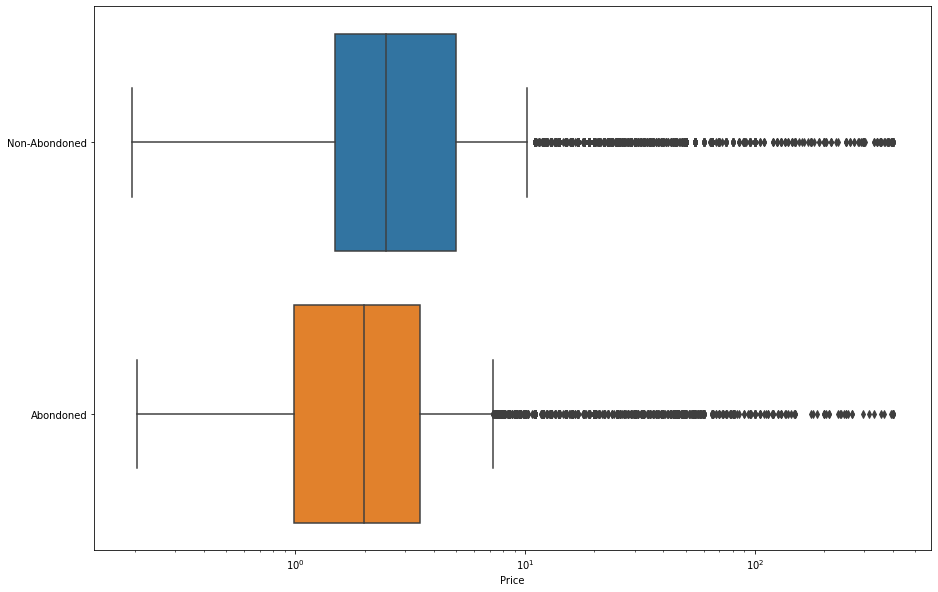

In [35]:
PriceFilteredDf = df[df.Price>0]
app_price = {
    "Abondened":["Abondoned" if x else "Non-Abondoned" for x  in PriceFilteredDf["Last Updated"]<="2019"],
    "Abondened_Price":PriceFilteredDf["Price"]
}
ax = sns.boxplot(data=app_price, x="Abondened_Price",  y="Abondened" )
ax.set_xscale('log',base=10)
# ax.set_yscale('log',base=2)

### Free & Paid in Abondened App

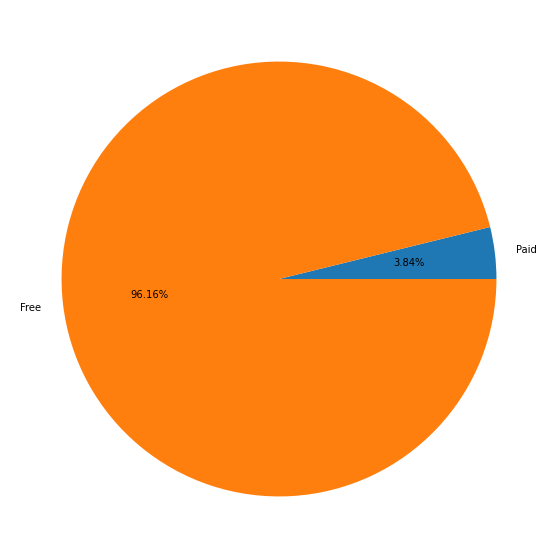

In [36]:
abondened = df[df["Last Updated"]<"2019"]

abondened_paid_free = {
    "Paid": abondened.Price[abondened.Price > 0].count(),
    "Free": abondened.Price[abondened.Price == 0].count()
}

ax = plt.pie(abondened_paid_free.values(), labels=abondened_paid_free.keys(), autopct='%1.2f%%')

### Ad Supported in Abondened App

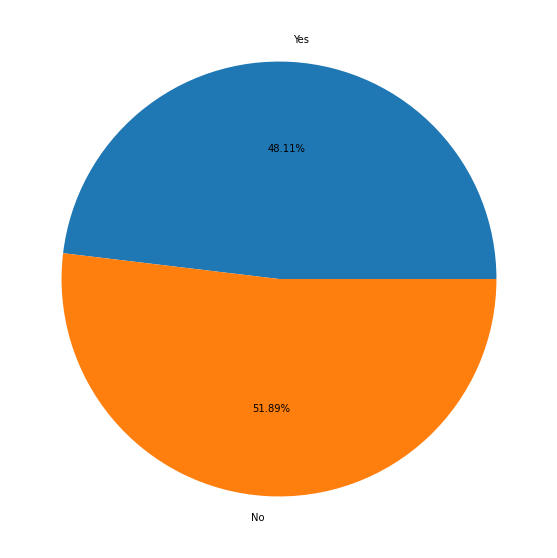

In [37]:
abondened = df[df["Last Updated"]<"2019"]

abondened_ad_supported = {
    
    "Yes": abondened["Ad Supported"][abondened["Ad Supported"] == True].count(),
    "No" : abondened["Ad Supported"][abondened["Ad Supported"] == False].count()  
}

ax = plt.pie(abondened_ad_supported.values(), labels=abondened_ad_supported.keys(), autopct='%1.2f%%')

### Editors Choice in Abondened App

Only 14 are Editor's choice out of 489483 abondend apps.


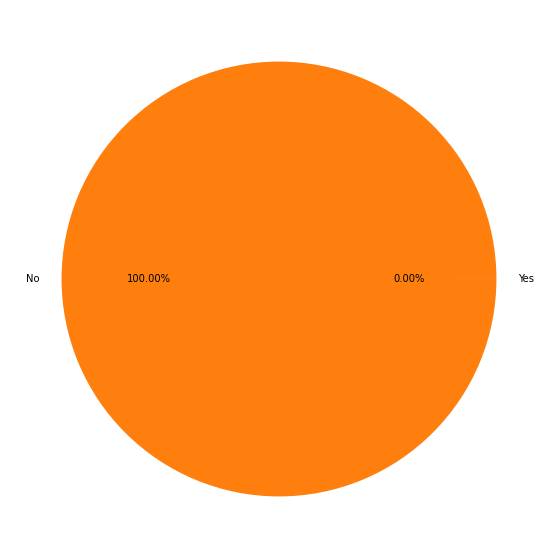

In [38]:
abondened = df[df["Last Updated"]<"2019"]

abondened_editor_choice = {
    
    "Yes": abondened["Editors Choice"][abondened["Editors Choice"] == True].count(),
    "No" : abondened["Editors Choice"][abondened["Editors Choice"] == False].count()  
}

ax = plt.pie(abondened_editor_choice.values(), labels=abondened_editor_choice.keys(), autopct='%1.2f%%')



print(f"Only {abondened_editor_choice['Yes']} are Editor's choice out of {abondened_editor_choice['No']+abondened_editor_choice['Yes']} abondend apps.")

### Editors Choice in Abondened App

In [39]:
Editors_Choice=abondened[abondened["Editors Choice"]]

HTML(Editors_Choice[["App Name","Category","Rating","Price","Last Updated"]][0:10].to_html(index=False))

App Name,Category,Rating,Price,Last Updated
LAYTON’S MYSTERY JOURNEY – Starter Kit,Adventure,3.6,0.00,2018-01-24
Mushroom 11,Puzzle,4.6,4.99,2018-05-13
Mind Construct,Arcade,4.0,0.00,2018-05-29
OXENFREE,Adventure,4.1,4.99,2017-06-28
Lara Croft GO,Puzzle,4.6,5.99,2018-07-05
Returner 77,Puzzle,4.3,4.99,2018-05-09
Cube Escape: Paradox,Adventure,4.8,0.00,2018-12-28
Galaxy on Fire 2™ HD,Arcade,4.5,0.00,2018-10-30
Rusty Lake: Roots,Adventure,4.8,3.49,2018-09-29
Medite.se,Health & Fitness,2.3,0.00,2018-12-11


# DATA CLEANING 


In [40]:
df=df.drop(columns=["Developer Id","Developer Website","Developer Email","Privacy Policy","App Id","Currency","Scraped Time","Installs"],axis= 1)

In [41]:
df.isnull().sum()

App Name                2
Category                0
Rating              22883
Rating Count        22883
Minimum Installs      107
Maximum Installs        0
Free                    0
Price                   0
Size                  196
Minimum Android      6530
Released            71053
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [42]:
df = df.dropna(subset=["App Name"])

In [43]:
df=df.drop(columns=["App Name"],axis=1) 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312942 entries, 0 to 2312943
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Category          object        
 1   Rating            float64       
 2   Rating Count      float64       
 3   Minimum Installs  float64       
 4   Maximum Installs  int64         
 5   Free              bool          
 6   Price             float64       
 7   Size              float64       
 8   Minimum Android   object        
 9   Released          datetime64[ns]
 10  Last Updated      datetime64[ns]
 11  Content Rating    object        
 12  Ad Supported      bool          
 13  In App Purchases  bool          
 14  Editors Choice    bool          
dtypes: bool(4), datetime64[ns](2), float64(5), int64(1), object(3)
memory usage: 220.6+ MB


In [45]:
# df['Installs'] = df['Installs'].fillna(df['Installs'].mode()[0])

In [46]:
df['Minimum Installs'] = df['Minimum Installs'].fillna(df['Minimum Installs'].mean())

In [47]:
df['Size'] = df['Size'].fillna(df['Size'].median())

In [48]:
df['Minimum Android'] = df['Minimum Android'].fillna(df['Minimum Android'].mode()[0])

In [49]:
df['Released'] = df['Released'].fillna(df['Released'].mean())

In [50]:
df.isnull().sum()

Category                0
Rating              22883
Rating Count        22883
Minimum Installs        0
Maximum Installs        0
Free                    0
Price                   0
Size                    0
Minimum Android         0
Released                0
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [51]:
df_with_ratings = df[df.Rating > 0]

In [52]:
def getOutliers(df, x):
    q1  = df[x].quantile(.25)
    q3  = df[x].quantile(.75)
    iqr = q3-q1
    minOut = np.where(df[[x]]<(q1-1.5*iqr), False, True)
    maxOut = np.where(df[[x]]>(q3+1.5*iqr), False, True)
    boolIdx = (minOut & maxOut)
    return boolIdx, (~boolIdx).sum() 

In [53]:
idx,count = getOutliers(df_with_ratings, "Price")
(count/df_with_ratings.shape[0])*100

2.0754338180130487

In [54]:
dataframe_without_outlierr = df_with_ratings[idx]
dataframe_without_outlierr

,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1,Tools,4.4,64.0,5000.0,7662,True,0.0,2.9,5.0 and up,2020-05-21 00:00:00.000000000,2021-05-06,Everyone,True,False,False
3,Communication,5.0,5.0,10.0,19,True,0.0,1.8,4.0.3 and up,2018-09-10 00:00:00.000000000,2018-10-13,Everyone,True,False,False
6,Libraries & Demo,4.5,12.0,1000.0,2567,True,0.0,2.5,4.1 and up,2019-09-23 00:00:00.000000000,2019-09-27,Everyone,True,False,False
7,Lifestyle,2.0,39.0,500.0,702,True,0.0,16.0,5.0 and up,2019-06-21 00:00:00.000000000,2019-06-21,Everyone,False,False,False
9,Personalization,4.7,820.0,50000.0,62433,True,0.0,3.5,4.1 and up,2019-09-22 00:00:00.000000000,2020-10-07,Everyone,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312933,Music & Audio,4.0,344.0,500000.0,814548,True,0.0,4.1,2.2 and up,2014-12-11 00:00:00.000000000,2014-12-11,Everyone,False,False,False
2312938,Education,3.4,17.0,1000.0,1980,True,0.0,10.0,4.1 and up,2018-05-22 00:00:00.000000000,2018-12-14,Everyone,True,False,False
2312939,Role Playing,4.3,16775.0,100000.0,337109,True,0.0,77.0,4.1 and up,2018-08-29 21:31:34.540005632,2021-06-01,Teen,False,False,False
2312942,Music & Audio,3.5,8.0,1000.0,2635,True,0.0,10.0,5.0 and up,2016-08-01 00:00:00.000000000,2021-05-05,Everyone,True,False,False


In [55]:
idx,count = getOutliers(dataframe_without_outlierr, "Rating")
(count/df_with_ratings.shape[0])*100

3.5385764575545577

In [56]:
dataframe_without_outlierr = dataframe_without_outlierr[idx]
dataframe_without_outlierr

,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1,Tools,4.4,64.0,5000.0,7662,True,0.0,2.9,5.0 and up,2020-05-21 00:00:00.000000000,2021-05-06,Everyone,True,False,False
3,Communication,5.0,5.0,10.0,19,True,0.0,1.8,4.0.3 and up,2018-09-10 00:00:00.000000000,2018-10-13,Everyone,True,False,False
6,Libraries & Demo,4.5,12.0,1000.0,2567,True,0.0,2.5,4.1 and up,2019-09-23 00:00:00.000000000,2019-09-27,Everyone,True,False,False
9,Personalization,4.7,820.0,50000.0,62433,True,0.0,3.5,4.1 and up,2019-09-22 00:00:00.000000000,2020-10-07,Everyone,True,False,False
10,Racing,4.9,55.0,100.0,329,True,0.0,51.0,4.4 and up,2020-07-30 00:00:00.000000000,2020-07-30,Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312933,Music & Audio,4.0,344.0,500000.0,814548,True,0.0,4.1,2.2 and up,2014-12-11 00:00:00.000000000,2014-12-11,Everyone,False,False,False
2312938,Education,3.4,17.0,1000.0,1980,True,0.0,10.0,4.1 and up,2018-05-22 00:00:00.000000000,2018-12-14,Everyone,True,False,False
2312939,Role Playing,4.3,16775.0,100000.0,337109,True,0.0,77.0,4.1 and up,2018-08-29 21:31:34.540005632,2021-06-01,Teen,False,False,False
2312942,Music & Audio,3.5,8.0,1000.0,2635,True,0.0,10.0,5.0 and up,2016-08-01 00:00:00.000000000,2021-05-05,Everyone,True,False,False


In [57]:
idx,count = getOutliers(dataframe_without_outlierr, "Rating Count")
(count/df_with_ratings.shape[0])*100

15.832843614184217

### Stripplot for Size

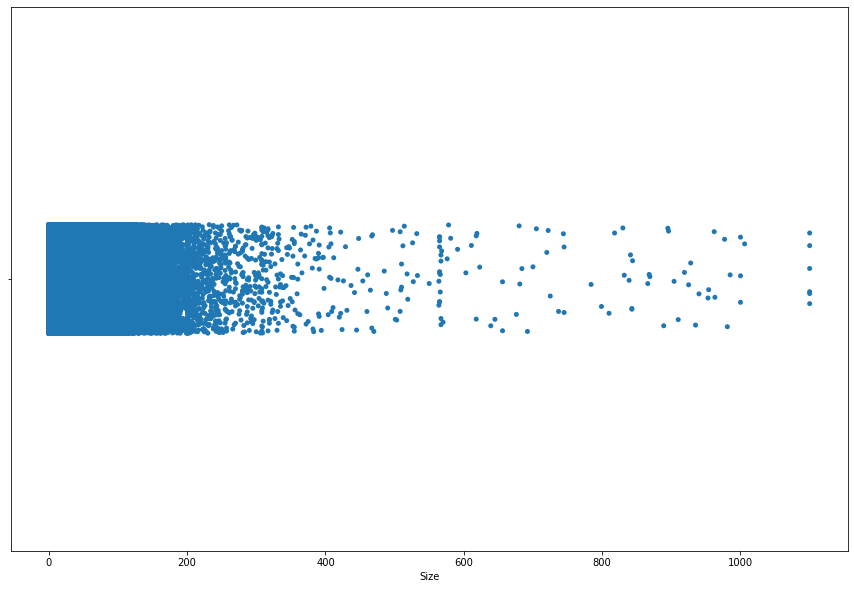

In [58]:
ax = sns.stripplot(data=dataframe_without_outlierr, x="Size")


In [59]:
dataframe_without_outlierr = dataframe_without_outlierr[dataframe_without_outlierr.Size < 450]

### Stripplot after Removing Outlier of Size 

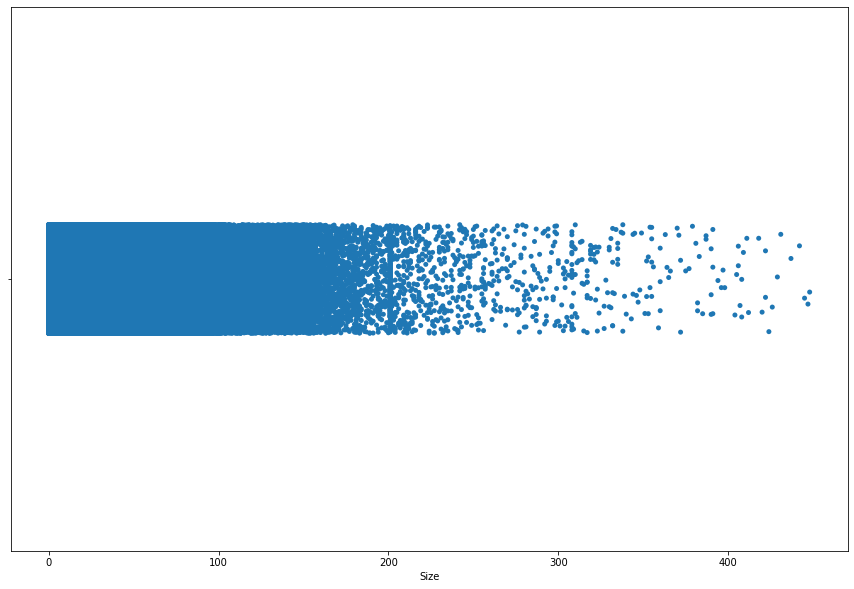

In [60]:
ax = sns.stripplot(data=dataframe_without_outlierr, x="Size")

### Stripplot of Rating Count 

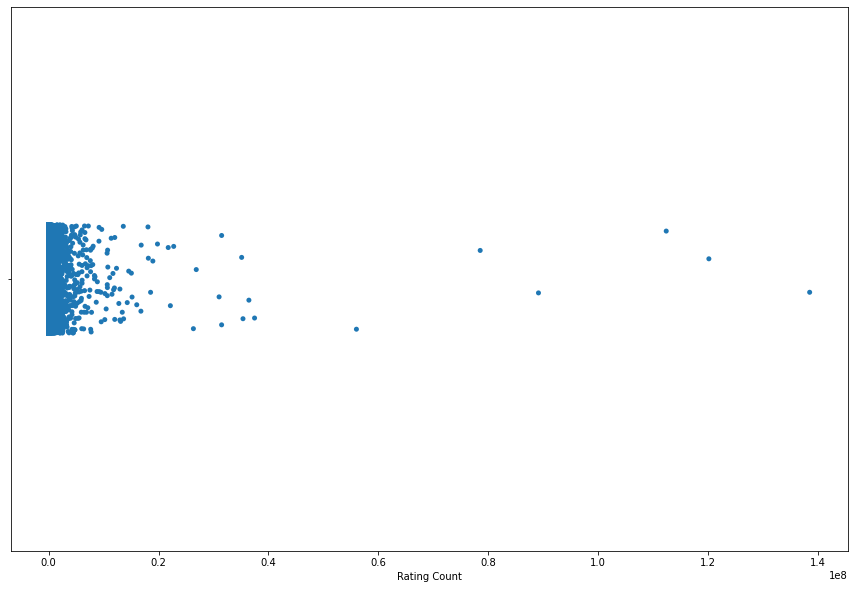

In [61]:
ax = sns.stripplot(data=dataframe_without_outlierr, x="Rating Count")

In [62]:
dataframe_without_outlierr =dataframe_without_outlierr[dataframe_without_outlierr["Rating Count"] < 0.03e8]

### Stripplot after Removing Outlier of Rating Count 

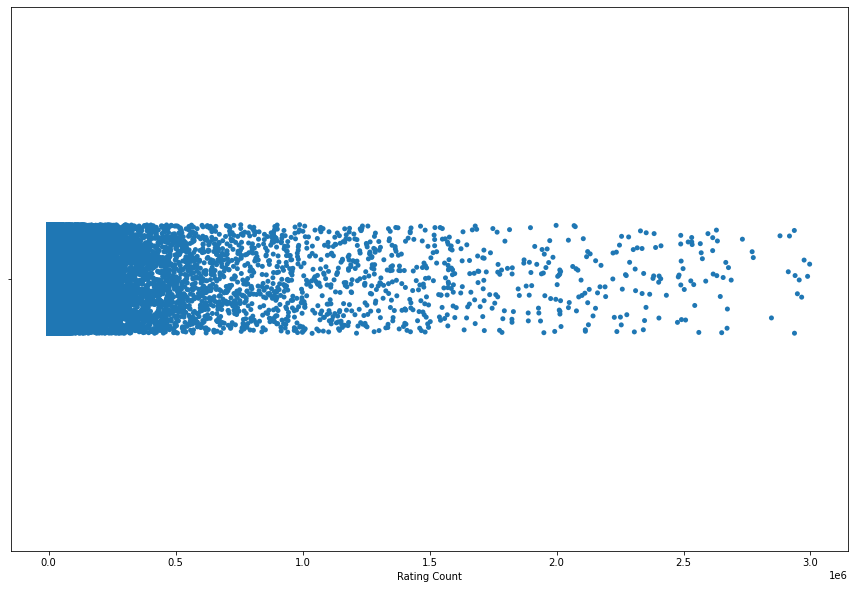

In [63]:
ax = sns.stripplot(data=dataframe_without_outlierr, x="Rating Count")

### Stripplot for Minimum Installs

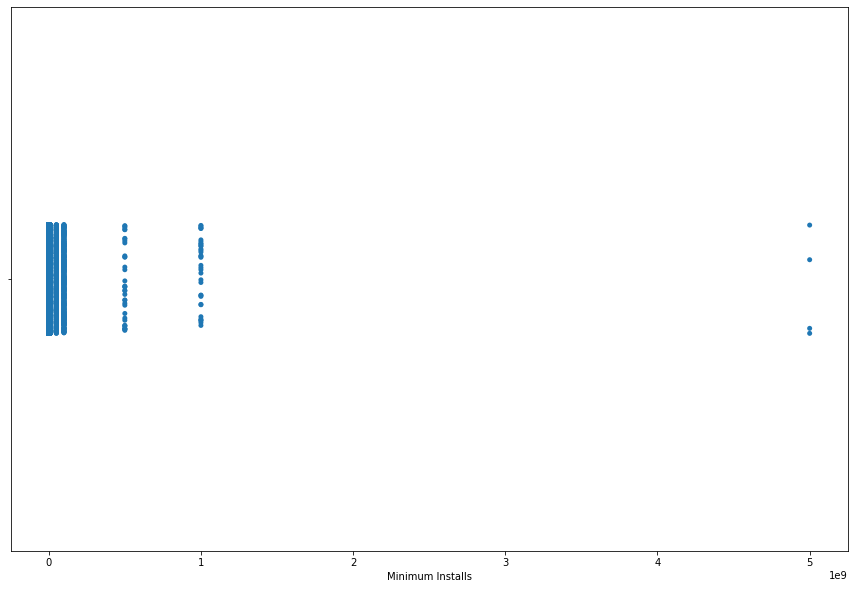

In [64]:
ax = sns.stripplot(data=dataframe_without_outlierr, x="Minimum Installs")

In [65]:
dataframe_without_outlierr=dataframe_without_outlierr[dataframe_without_outlierr["Minimum Installs"] < 0.1e9]

### Stripplot after Removing Outlier of Minimum Installs

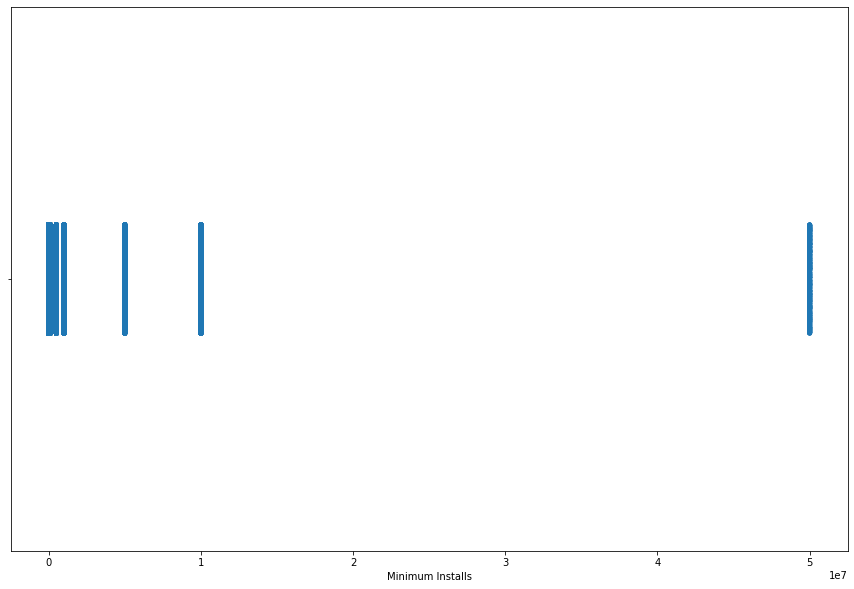

In [66]:
ax = sns.stripplot(data=dataframe_without_outlierr, x="Minimum Installs")

In [67]:
dataframe_without_outlierr.isnull().sum()

Category            0
Rating              0
Rating Count        0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Size                0
Minimum Android     0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

In [68]:
dataframe_without_outlierr["Minimum Android"].value_counts()

4.1 and up      316044
5.0 and up      189924
4.4 and up      187662
4.0.3 and up     91930
4.0 and up       79797
                 ...  
4.2 - 4.2.2          1
1.6 - 7.0            1
3.0 - 7.0            1
2.3 - 3.2            1
1.6 - 4.0.2          1
Name: Minimum Android, Length: 131, dtype: int64

In [69]:
dataframe_without_outlierr["Minimum Android"].value_counts()

4.1 and up      316044
5.0 and up      189924
4.4 and up      187662
4.0.3 and up     91930
4.0 and up       79797
                 ...  
4.2 - 4.2.2          1
1.6 - 7.0            1
3.0 - 7.0            1
2.3 - 3.2            1
1.6 - 4.0.2          1
Name: Minimum Android, Length: 131, dtype: int64

In [70]:
minimumAndroidValues = dataframe_without_outlierr["Minimum Android"].value_counts()
minimumAnroidKeys  = minimumAndroidValues[(minimumAndroidValues > 100)].keys()


In [71]:
dataframe_without_outlierr = dataframe_without_outlierr[dataframe_without_outlierr["Minimum Android"].isin(minimumAnroidKeys)]

In [72]:
Content_Rating_Values = dataframe_without_outlierr["Content Rating"].value_counts()
Content_Rating_keys  = Content_Rating_Values[(Content_Rating_Values > 200)].keys()
Content_Rating_keys

Index(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+'], dtype='object')

In [73]:
dataframe_without_outlierr = dataframe_without_outlierr[dataframe_without_outlierr["Content Rating"].isin(Content_Rating_keys)]

# DATA MODELING 


In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [76]:
dataframe_without_outlierr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159820 entries, 1 to 2312943
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Category          1159820 non-null  object        
 1   Rating            1159820 non-null  float64       
 2   Rating Count      1159820 non-null  float64       
 3   Minimum Installs  1159820 non-null  float64       
 4   Maximum Installs  1159820 non-null  int64         
 5   Free              1159820 non-null  bool          
 6   Price             1159820 non-null  float64       
 7   Size              1159820 non-null  float64       
 8   Minimum Android   1159820 non-null  object        
 9   Released          1159820 non-null  datetime64[ns]
 10  Last Updated      1159820 non-null  datetime64[ns]
 11  Content Rating    1159820 non-null  object        
 12  Ad Supported      1159820 non-null  bool          
 13  In App Purchases  1159820 non-null  bool  

In [77]:
dataframe_without_outlierr["Category"] = label_encoder.fit_transform(dataframe_without_outlierr["Category"])

In [78]:
dataframe_without_outlierr["Free"] = label_encoder.fit_transform(dataframe_without_outlierr["Free"])

In [79]:
dataframe_without_outlierr["Minimum Android"] = label_encoder.fit_transform(dataframe_without_outlierr["Minimum Android"])

In [80]:
dataframe_without_outlierr["Content Rating"] = label_encoder.fit_transform(dataframe_without_outlierr["Content Rating"])

In [81]:
dataframe_without_outlierr["Ad Supported"] = label_encoder.fit_transform(dataframe_without_outlierr["Ad Supported"])

In [82]:
dataframe_without_outlierr["In App Purchases"] = label_encoder.fit_transform(dataframe_without_outlierr["In App Purchases"])

In [83]:
dataframe_without_outlierr["Editors Choice"] = label_encoder.fit_transform(dataframe_without_outlierr["Editors Choice"])

In [84]:
dataframe_without_outlierr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159820 entries, 1 to 2312943
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Category          1159820 non-null  int64         
 1   Rating            1159820 non-null  float64       
 2   Rating Count      1159820 non-null  float64       
 3   Minimum Installs  1159820 non-null  float64       
 4   Maximum Installs  1159820 non-null  int64         
 5   Free              1159820 non-null  int64         
 6   Price             1159820 non-null  float64       
 7   Size              1159820 non-null  float64       
 8   Minimum Android   1159820 non-null  int64         
 9   Released          1159820 non-null  datetime64[ns]
 10  Last Updated      1159820 non-null  datetime64[ns]
 11  Content Rating    1159820 non-null  int64         
 12  Ad Supported      1159820 non-null  int64         
 13  In App Purchases  1159820 non-null  int64 

In [85]:
dataframe_without_outlierr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159820 entries, 1 to 2312943
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Category          1159820 non-null  int64         
 1   Rating            1159820 non-null  float64       
 2   Rating Count      1159820 non-null  float64       
 3   Minimum Installs  1159820 non-null  float64       
 4   Maximum Installs  1159820 non-null  int64         
 5   Free              1159820 non-null  int64         
 6   Price             1159820 non-null  float64       
 7   Size              1159820 non-null  float64       
 8   Minimum Android   1159820 non-null  int64         
 9   Released          1159820 non-null  datetime64[ns]
 10  Last Updated      1159820 non-null  datetime64[ns]
 11  Content Rating    1159820 non-null  int64         
 12  Ad Supported      1159820 non-null  int64         
 13  In App Purchases  1159820 non-null  int64 

In [86]:
dataframe_without_outlierr.columns[~dataframe_without_outlierr.columns.isin(["Price"])]

Index(['Category', 'Rating', 'Rating Count', 'Minimum Installs',
       'Maximum Installs', 'Free', 'Size', 'Minimum Android', 'Released',
       'Last Updated', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice'],
      dtype='object')

### Heatmap of Correlation 

<AxesSubplot:>

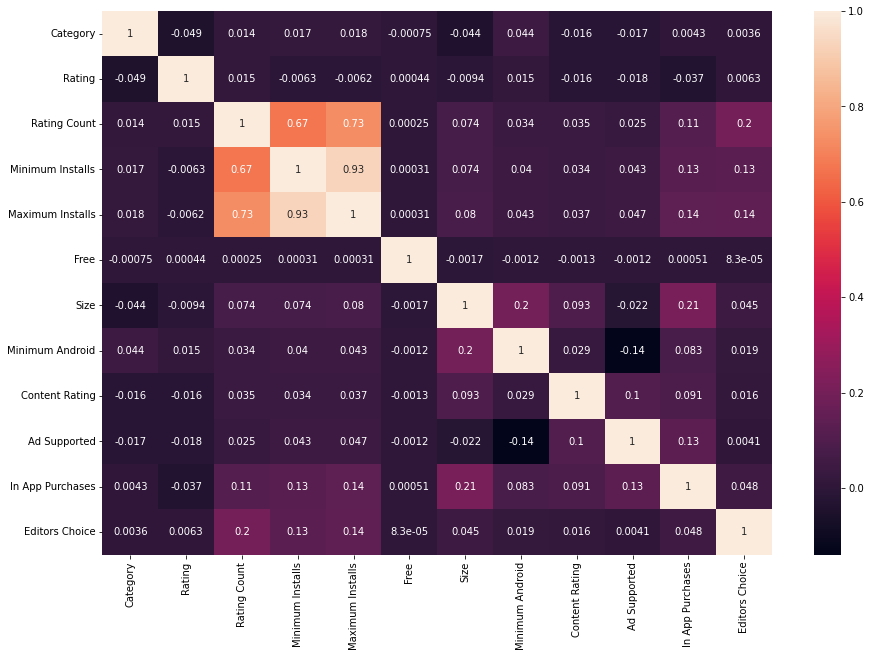

In [87]:

without_price = dataframe_without_outlierr[dataframe_without_outlierr.columns[~dataframe_without_outlierr.columns.isin(["Price"])]]
corr = without_price.corr()
sns.heatmap(corr , annot=True)

# DATA NORMALIZATION


In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [89]:
dataframe_without_outlierr[["Rating Count", "Minimum Installs", "Maximum Installs", "Size"]] = scaler.fit_transform(dataframe_without_outlierr[["Rating Count", "Minimum Installs", "Maximum Installs", "Size"]])

In [90]:
dataframe_without_outlierr["Released"] = dataframe_without_outlierr["Released"].apply(lambda x: datetime.timestamp(x))

In [91]:
dataframe_without_outlierr["Last Updated"] = dataframe_without_outlierr["Last Updated"].apply(lambda x: datetime.timestamp(x))

# DATA SPLITTING

In [92]:
x = dataframe_without_outlierr[["Category","Rating Count","Minimum Installs","Maximum Installs","Free","Size","Minimum Android","Content Rating","Released","Last Updated","Ad Supported","In App Purchases","Editors Choice"]]
y = dataframe_without_outlierr["Rating"]

In [93]:
x

,Category,Rating Count,Minimum Installs,Maximum Installs,Free,Size,Minimum Android,Content Rating,Released,Last Updated,Ad Supported,In App Purchases,Editors Choice
1,42,0.000020,1.000000e-04,7.674034e-05,1,0.006473,19,0,1.590019e+09,1.620259e+09,1,0,0
3,13,0.000000,2.000000e-07,1.902984e-07,1,0.004018,13,0,1.536538e+09,1.539389e+09,1,0,0
6,23,0.000002,2.000000e-05,2.571032e-05,1,0.005580,14,0,1.569197e+09,1.569542e+09,1,0,0
9,31,0.000274,1.000000e-03,6.253106e-04,1,0.007812,14,0,1.569110e+09,1.602029e+09,1,0,0
10,35,0.000017,2.000000e-06,3.295167e-06,1,0.113839,17,0,1.596067e+09,1.596067e+09,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312933,28,0.000114,1.000000e-02,8.158274e-03,1,0.009152,6,0,1.418256e+09,1.418256e+09,0,0,0
2312938,15,0.000004,2.000000e-05,1.983110e-05,1,0.022321,14,0,1.526947e+09,1.544746e+09,1,0,0
2312939,36,0.005637,2.000000e-03,3.376385e-03,1,0.171875,14,3,1.535578e+09,1.622506e+09,0,0,0
2312942,28,0.000001,2.000000e-05,2.639139e-05,1,0.022321,19,0,1.470010e+09,1.620173e+09,1,0,0


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3, shuffle=True, random_state = 2332)

In [96]:
x_train

,Category,Rating Count,Minimum Installs,Maximum Installs,Free,Size,Minimum Android,Content Rating,Released,Last Updated,Ad Supported,In App Purchases,Editors Choice
1777986,8,3.731257e-05,0.000200,0.000215,1,0.100446,24,0,1.497485e+09,1.622074e+09,0,0,0
1285238,28,0.000000e+00,0.000020,0.000015,1,0.011607,14,0,1.535328e+09,1.586218e+09,1,0,0
1406337,18,6.722985e-06,0.000100,0.000066,1,0.029018,14,0,1.568938e+09,1.569456e+09,0,0,0
1193640,25,8.067582e-06,0.000100,0.000053,1,0.037946,17,0,1.412640e+09,1.530058e+09,1,0,0
595969,32,3.361493e-07,0.000002,0.000004,1,0.014509,13,0,1.490227e+09,1.490314e+09,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373952,24,5.378388e-06,0.000020,0.000028,1,0.069196,19,0,1.548029e+09,1.622074e+09,0,0,0
1126732,34,8.067582e-06,0.000020,0.000013,1,0.069196,14,0,1.497744e+09,1.601856e+09,1,1,0
2173798,16,1.378212e-05,0.000002,0.000003,1,0.014062,21,0,1.559434e+09,1.582416e+09,1,0,0
2140949,8,2.386660e-05,0.000100,0.000064,1,0.087054,19,0,1.380931e+09,1.619741e+09,0,0,0


# MODEL TRANING

## Regression

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [98]:
rgr = LinearRegression()
rgr.fit(x_train,y_train)
y_pred = rgr.predict(x_test)
mean_squared_error(y_test, y_pred)

0.3259846008344114

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
rgr = RandomForestRegressor(n_estimators=121)
rgr.fit(x_train,y_train)
y_pred = rgr.predict(x_test)
mean_squared_error(y_test, y_pred)

0.24354002540352596

## Classification

In [101]:
y.min()

2.6

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [103]:
def classEncoder(x):
    if x < 3.0:
        return 0 #low
    elif x >= 3.0 and x < 4.3:
        return 1 #medium
    else:
        return 2

In [104]:
y_train = y_train.apply(classEncoder)
y_test = y_test.apply(classEncoder)

In [105]:
clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_pred, y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.28      0.52      0.37     88898
           2       0.77      0.52      0.62    259048

    accuracy                           0.52    347946
   macro avg       0.35      0.35      0.33    347946
weighted avg       0.65      0.52      0.56    347946



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.22      0.00        99
           1       0.70      0.64      0.67    177031
           2       0.69      0.70      0.70    170816

    accuracy                           0.67    347946
   macro avg       0.47      0.52      0.46    347946
weighted avg       0.70      0.67      0.68    347946



In [108]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([ 29011, 377755, 405108]))